In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# READING DATASETS

In [2]:
train = pd.read_csv("E://study materials//INTERNSHALA TRAINING//data science//Problem Statement//files//train.csv")
test = pd.read_csv("E://study materials//INTERNSHALA TRAINING//data science//Problem Statement//files//test.csv")

# EXPLORING DATASETS

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
train.shape , test.shape

((31647, 18), (13564, 17))

In [6]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# UNIVARIATE ANALYSIS

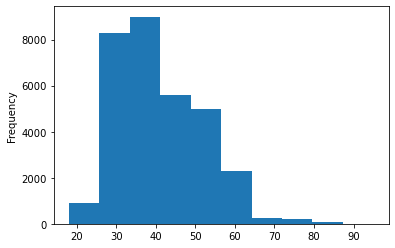

In [8]:
train["age"].plot.hist()

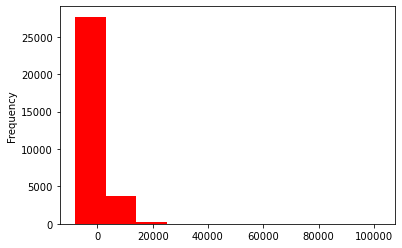

In [9]:
train["balance"].plot.hist(color="red")

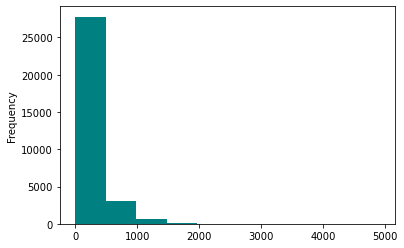

In [10]:
train["duration"].plot.hist(color="teal")

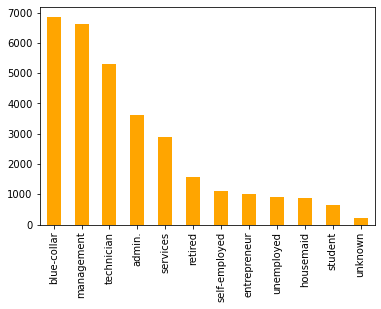

In [11]:
train['job'].value_counts().plot.bar(color="orange")

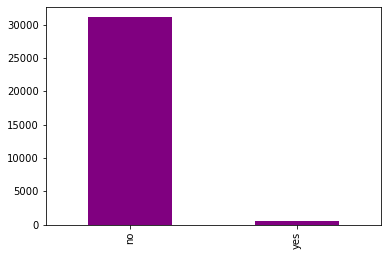

In [12]:
train['default'].value_counts().plot.bar(color="purple")

# BIVARIATE ANALYSIS

In [13]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

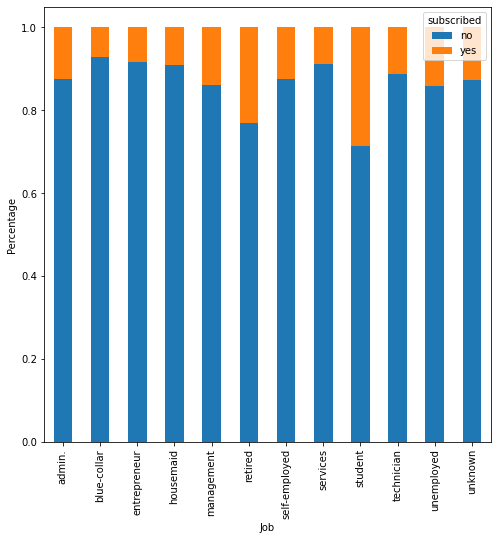

In [14]:
job = pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [15]:
print(pd.crosstab(train['default'],train['subscribed']))

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

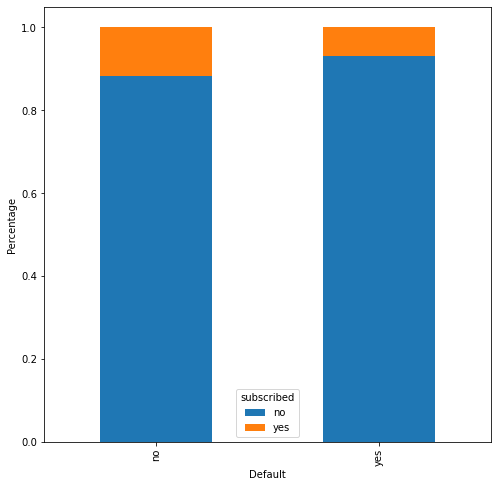

In [16]:
default = pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Default')
plt.ylabel('Percentage')

In [17]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [18]:
corr=train.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


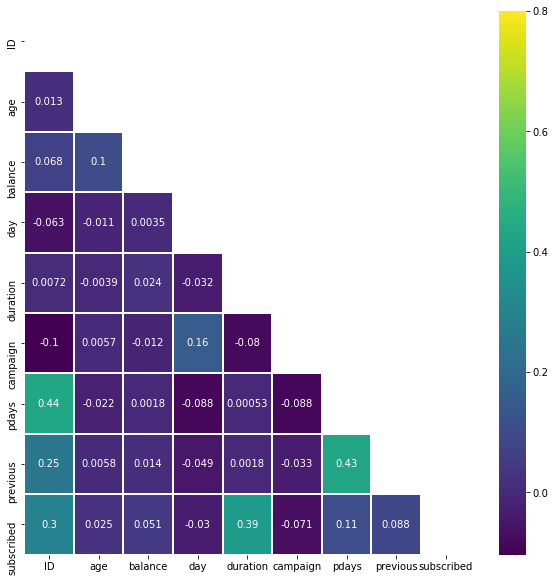

In [19]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap="viridis", linewidth=1, linecolor="white", vmax=.8, annot=True)

# CHECKING FOR NULL VALUES

In [20]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [21]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# OUTLIERS DETECTION AND HANDLING

In [22]:
def detect_outliers(train):
    outlier=[]
    threshold=3
    mean=np.mean(train)
    std=np.std(train)
    for i in train:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [23]:
print("No. of Outliers Present: ",len(detect_outliers(train["balance"])))

No. of Outliers Present:  525


In [24]:
print("No. of Outliers Present: ",len(detect_outliers(train["duration"])))

No. of Outliers Present:  669


{'whiskers': [<matplotlib.lines.Line2D at 0x1562aee4760>,
 'caps': [<matplotlib.lines.Line2D at 0x1562af644f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1562adb7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1562aeb0a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1562aeb0d90>],
 'means': []}

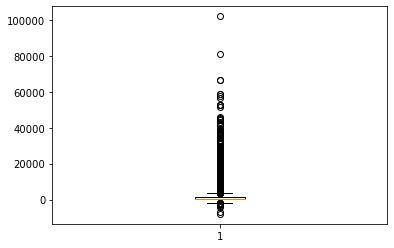

In [25]:
detect_outliers(train["balance"])
plt.boxplot(train["balance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1562af8ffa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1562b135a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1562b035670>],
 'medians': [<matplotlib.lines.Line2D at 0x1562b9e15b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1562b061700>],
 'means': []}

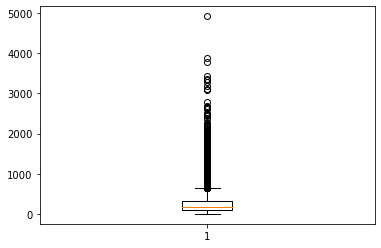

In [26]:
detect_outliers(train["duration"])
plt.boxplot(train["duration"])

In [27]:
train.loc[train["balance"]>40000,'balance']=np.median(train["balance"])

In [28]:
train.loc[train["duration"]>2000,'duration']=np.median(train["duration"])

# MODEL BUILDING

In [29]:
target = train['subscribed']
train = train.drop('subscribed',axis=1)

In [30]:
train = pd.get_dummies(train)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size = 0.2, random_state=15)

# LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred = lr.predict(X_valid)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_valid, pred)

0.8913112164296998

# DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree_cls = DecisionTreeClassifier(max_depth=7, random_state=0)

In [41]:
tree_cls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [42]:
pred = tree_cls.predict(X_valid)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
accuracy_score(y_valid, pred)

0.9118483412322275

In [44]:
test = pd.get_dummies(test)

In [45]:
test_pred = tree_cls.predict(test)

In [46]:
res = pd.DataFrame()

In [47]:
res['ID'] = test['ID']
res['subscribed'] = test_pred

In [48]:
res['subscribed'].replace(0,'no',inplace=True)
res['subscribed'].replace(1,'yes',inplace=True)

In [49]:
res.to_csv('E://study materials//INTERNSHALA TRAINING//data science//Problem Statement//files//result.csv', header=True, index=False)